### ISM6251 – Final Group Project

# Predicting Team-Level Productivity in Garment Manufacturing
## A Classification Model for Operational Efficiency

## Team Members
- Arushi Panwar
- Nairi Keeney
- Mude Jayaprakash Naik

## Index

- [Part 1: Introduction](#Part-1:-Introduction)
  - [1. Business Context and Problem](#1.-Business-Context-and-Problem)
  - [2. Dataset Details](#2.-Dataset-Details)
  - [3. Objective](#3.-Objective)
  - [4. Why This Problem Matters?](#4.-Why-This-Problem-Matters?)

- [Part 2: Data Loading, Exploration, and Preprocessing](#Part-2:-Data-Loading,-Exploration,-and-Preprocessing)
  - [1. Importing Necessary Libraries](#1.-Importing-Necessary-Libraries)
  - [2. Data Loading](#2.-Data-Loading)
  - [3. Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
  - [4. Data Preprocessing](#4.-Data-Preprocessing)

- [Part 3. Model Building](#Part-3.-Model-Building)
  - [1. Logistic Regression](#1.-Logistic-Regression)
  - [2. Random Forest](#2.-Random-Forest)
  - [3. Gradient Boost Models - LightGBM](#3.-Gradient-Boost-Models---LightGBM)

- [Part 4. Findings and Discussion](#Part-4.-Findings-and-Discussion)
  - [1. Error Analysis](#1.-Error-Analysis)
  - [2. Comparison of Evaluation Metrics](#2.-Comparison-of-Evaluation-Metrics)
  - [3. Model Comparison Summary](#3.-Model-Comparison-Summary)
  - [4. Recommended Model and its usage](#4.-Recommended-Model-and-its-usage)

- [Part 5. Conclusion](#Part-5.-Conclusion)

# Part 1: Introduction

## 1. Business Context and Problem

The garment manufacturing industry is labor-intensive and deadline-driven, especially in countries like Bangladesh. Meeting daily productivity targets is vital for profit and timely delivery. Yet, decisions to manage workforce performance are often reactive, leading to missed delivery targets and inefficient labor use.

A classification model using features like team size, task type, idle men, etc., can enable early interventions, turning reactive management into proactive, data-driven action.

### Business Problem
At the beginning of the workday, identify if a team will meet their daily productivity targets based on available operational features.

## 2. Dataset Details

### Dataset Selection

The dataset **Productivity Prediction of Garment Employees** is chosen for this project from the UCI Machine Learning Repository.  
This dataset contains information on 1197 Instances with 15 variables and missing values.

### Dataset Link

https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

### Extraction Details

This data was collected manually and includes the main attributes of the garment manufacturing process and the productivity of the employees, which is also validated by industry experts.

### Dataset Overview

The dataset includes the following attributes:

- **date**: Date of observation in MM-DD-YYYY format – *Date*  
- **quarter**: A portion of the month. A month was divided into four quarters  – *Categorical*  
- **department**: Department type within the factory (e.g., sewing, finishing) – *Categorical*  
- **day**: Day of the week – *Categorical*  
- **team**: Numeric identifier assigned to each production team – *Integer*  
- **targeted_productivity**: Pre-assigned productivity goal for the team on that day – *Continuous*  
- **smv**: Standard Minute Value; time allotted to complete a task – *Continuous*  
- **wip**: Work-in-progress: Includes number of unfinished items for products – *Integer*
- **over_time**: Total overtime (in minutes) logged by the team – *Integer*  
- **incentive**: Bonus amount (in Bangladeshi Taka - BDT) offered to boost performance – *Integer*  
- **idle_time**: Number of minutes the team remained inactive during work hours – *Integer*  
- **idle_men**: Number of idle workers during downtime – *Integer*  
- **no_of_style_change**: Number of changes in the style of a particular product. – *Integer*  
- **no_of_workers**: Total number of workers in the team – *Integer*  
- **actual_productivity**: Final achieved productivity for the team (scaled 0 to 1) – *Continuous*

Out of these, the **wip** variable has missing values.

## 3. Objective

While previous studies have used this data to predict exact productivity values or segment them into multiple classes, our project takes a more actionable approach by reframing the problem as a binary classification task:

**Will a team meet its productivity target today?**

This helps factory supervisors take early action, adjusting resources or support before productivity drops, turning reactive management into proactive decision-making.

### Goal
By using team-level operational features, develop a model to predict whether a production team will achieve its daily target. The target variable is defined as:

1 → Team did not meet the target  
0 → Team met or exceeded the target  


## 4. Why This Problem Matters?
- Garment manufacturing is a key economic driver in countries like Bangladesh, yet daily production decisions are often reactive rather than data-driven.
- Failure to meet productivity targets leads to missed deadlines, increased labor costs, and reputational damage for global suppliers.
- Failure to identify productive teams leads to missed recognition, underutilization of resources, and a possible drop in motivation, indirectly impacting productivity.
- Right now, supervisors lack early insight into whether teams will meet their targets, and interventions often come too late to be effective.
- A proactive classification model would empower managers to recognize productive teams and reallocate resources in real time, improving efficiency, motivation, and preventing costly delays.
- Prior research focuses on regression or multi-class segmentation, but a **binary prediction model** provides a more actionable approach by answering the question: **intervene now or stay the course**.
- Even small gains in correctly predicting low-performing vs high-performing teams can translate into major cost savings and operational improvements at scale.

[Index](#Index)

# Part 2: Data Loading, Exploration, and Preprocessing

## 1. Importing Necessary Libraries

In [ ]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, auc, average_precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, mean_squared_error, precision_recall_curve, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Ensure compatibility with Pandas 3
pd.options.mode.use_inf_as_na = True  # If handling infinite values as NA in Pandas 3

# For displaying all columns
pd.set_option('display.max_columns', None)

# Set random seed
np.random.seed(7)

/var/folders/dd/12gc6y0d43q88h764p32_xph0000gn/T/ipykernel_2596/3209264205.py:15: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True  # If handling infinite values as NA in Pandas 3


## 2. Data Loading

Loading the dataset directly from the UCI Machine Learning Repository using the script provided on their website.

This step requires the installation of **ucimlrepo** package. This package helps to easily import datasets from the UCI Machine Learning Repository into scripts and notebooks

In [559]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [560]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)

# data (as pandas dataframes)
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets

In [561]:
# Combining the X and y to create dataset
garment_data = pd.concat([X, y], axis=1)
# Checking the shape and column names
print(f"Data shape: {garment_data.shape}")
print("Columns preview:")
garment_data.columns.to_list()

Data shape: (1197, 15)
Columns preview:


['date',
 'quarter',
 'department',
 'day',
 'team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

### Target Variable

As we don't have the target variable by default in the data, we are creating the target variable as:

1 → Team did not meet the target  = `actual_productivity` < `targeted_productivity`

0 → Team met or exceeded the target  = `actual_productivity` >= `targeted_productivity`

And, also dropping the variables `actual_productivity` and `targeted_productivity`. 

In [564]:
# Creating the target variable by using actual_productivity and targeted_productivity
garment_data['productivity_met'] = (garment_data['actual_productivity'] < garment_data['targeted_productivity']).astype(int)

# Dropping actual_productivity and targeted_productivity variables
print("Data shape\nbefore dropping the columns:", garment_data.shape)

garment_data.drop(columns=['actual_productivity','targeted_productivity'], inplace=True)

print("after dropping the columns:", garment_data.shape)

Data shape
before dropping the columns: (1197, 16)
after dropping the columns: (1197, 14)


We will drop the `over_time` variable as well, as it is a reactive measure, so not helpful for proactive planning.

In [569]:
print("Data shape\nbefore dropping the column:", garment_data.shape)

garment_data.drop(columns=['over_time'], inplace=True)

print("after dropping the column:", garment_data.shape)

Data shape
before dropping the column: (1197, 14)
after dropping the column: (1197, 13)


In [571]:
print('\nViewing a few rows of Dataset: \n')
garment_data.head(10)


Viewing a few rows of Dataset: 



,date,quarter,department,day,team,smv,wip,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_met
0,1/1/2015,Quarter1,sweing,Thursday,8,26.16,1108.0,98,0.0,0,0,59.0,0
1,1/1/2015,Quarter1,finishing,Thursday,1,3.94,NaN,0,0.0,0,0,8.0,0
2,1/1/2015,Quarter1,sweing,Thursday,11,11.41,968.0,50,0.0,0,0,30.5,0
3,1/1/2015,Quarter1,sweing,Thursday,12,11.41,968.0,50,0.0,0,0,30.5,0
4,1/1/2015,Quarter1,sweing,Thursday,6,25.90,1170.0,50,0.0,0,0,56.0,0
5,1/1/2015,Quarter1,sweing,Thursday,7,25.90,984.0,38,0.0,0,0,56.0,0
6,1/1/2015,Quarter1,finishing,Thursday,2,3.94,NaN,0,0.0,0,0,8.0,0
7,1/1/2015,Quarter1,sweing,Thursday,3,28.08,795.0,45,0.0,0,0,57.5,0
8,1/1/2015,Quarter1,sweing,Thursday,2,19.87,733.0,34,0.0,0,0,55.0,0
9,1/1/2015,Quarter1,sweing,Thursday,1,28.08,681.0,45,0.0,0,0,57.5,0


[Index](#Index)

## 3. Exploratory Data Analysis

### Dataset Information

In [575]:
print('Shape of the Data: ', garment_data.shape)
print('\nData Types: \n')
print(garment_data.dtypes)

Shape of the Data:  (1197, 13)

Data Types: 

date                   object
quarter                object
department             object
day                    object
team                    int64
smv                   float64
wip                   float64
incentive               int64
idle_time             float64
idle_men                int64
no_of_style_change      int64
no_of_workers         float64
productivity_met        int64
dtype: object


### Statistical Summary

In [578]:
print('Statistical Summary:')
garment_data.describe(include='all')

Statistical Summary:


,date,quarter,department,day,team,smv,wip,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,productivity_met
count,1197,1197,1197,1197,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/11/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,15.062172,1190.465991,38.210526,0.730159,0.369256,0.150376,34.609858,0.269006
std,NaN,NaN,NaN,NaN,3.463963,10.943219,1837.455001,160.182643,12.709757,3.268987,0.427848,22.197687,0.443628
min,NaN,NaN,NaN,NaN,1.000000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,NaN,NaN,NaN,NaN,3.000000,3.940000,774.500000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
50%,NaN,NaN,NaN,NaN,6.000000,15.260000,1039.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000
75%,NaN,NaN,NaN,NaN,9.000000,24.260000,1252.500000,50.000000,0.000000,0.000000,0.000000,57.000000,1.000000


- The **department** and **day** variables are nominal as they do not have any inherent order.
- The **quarter** variable captures intra-month production phases and is supposed to have 4 values as per the data description, but we have 5 values in the data. Assuming that it is **ordinal** in nature, the order of quarters is:  
`Quarter1 < Quarter2 < Quarter3 < Quarter4 < Quarter5`.
- The **team** variable, even though it is numerical, is a nominal variable because it is an **identifier** assigned to each production team.

Therefore, there are 4 types of variables in this data:
- Date
- Numerical
- Categorical
  - Nominal
  - Ordinal

In [581]:
# Specifying different types of variables
target_variable =['productivity_met']
date_cols = ['date']
nominal_cols = ['team','department', 'day']
ordinal_cols = ['quarter']
numerical_cols = [col for col in garment_data.columns if col not in date_cols + nominal_cols+ ordinal_cols+target_variable]

print('Different types of variables in dataset are:')
print(f"\n {len(date_cols)} Date Column:\n", date_cols)
print(f"\n {len(nominal_cols)} Nominal Columns:\n", nominal_cols)
print(f"\n {len(ordinal_cols)} Ordinal Column:\n", ordinal_cols)
print(f"\n{ len(numerical_cols)} Numerical Columns:\n", numerical_cols)

Different types of variables in dataset are:

 1 Date Column:
 ['date']

 3 Nominal Columns:
 ['team', 'department', 'day']

 1 Ordinal Column:
 ['quarter']

7 Numerical Columns:
 ['smv', 'wip', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']


### Target Variable Distribution

In [584]:
print("Target Variable Distribution:")
print(garment_data['productivity_met'].value_counts())
print("\nPercentages:\n", garment_data['productivity_met'].value_counts()/garment_data.shape[0])

Target Variable Distribution:
productivity_met
0    875
1    322
Name: count, dtype: int64

Percentages:
 productivity_met
0    0.730994
1    0.269006
Name: count, dtype: float64


The minority class (`productivity_met` = 1) is ~27% of the total dataset, and the majority class (`productivity_met` = 0) is about 73%. This imbalance could impact the development and performance of machine learning models, leading them to favor the majority class.

Therefore, `stratify = y` is to be used while splitting the data to ensure that the class proportions are maintained in the Test and Train sets.

### Identifying missing values

As per the dataset description given in UCI Machine Learning Repository, only **wip** column has missing values, but we are cross-checking here to be sure.

In [588]:
# identifying missing values
print('Null Values in Garment Data: ')
print(garment_data.isnull().sum())

Null Values in Garment Data: 
date                    0
quarter                 0
department              0
day                     0
team                    0
smv                     0
wip                   506
incentive               0
idle_time               0
idle_men                0
no_of_style_change      0
no_of_workers           0
productivity_met        0
dtype: int64


In [590]:
print(f"Missing value percentage of wip column = {100*garment_data['wip'].isnull().mean():.2f}%")

Missing value percentage of wip column = 42.27%


As `42.3%` of values are missing, this column needs to be removed to maintain data integrity and prevent bias. But, this variable is critical as per domain knowledge, so we will impute the column using the following methods:
- As **wip** is a numerical column, we can impute it with either the `mean` or `median`, depending on the data distribution.
- We will be exploring relations with categorical variables. If it exists, will use *Group-based imputation* methods.


[Index](#Index)

### Vizualizations

#### Feature distributions

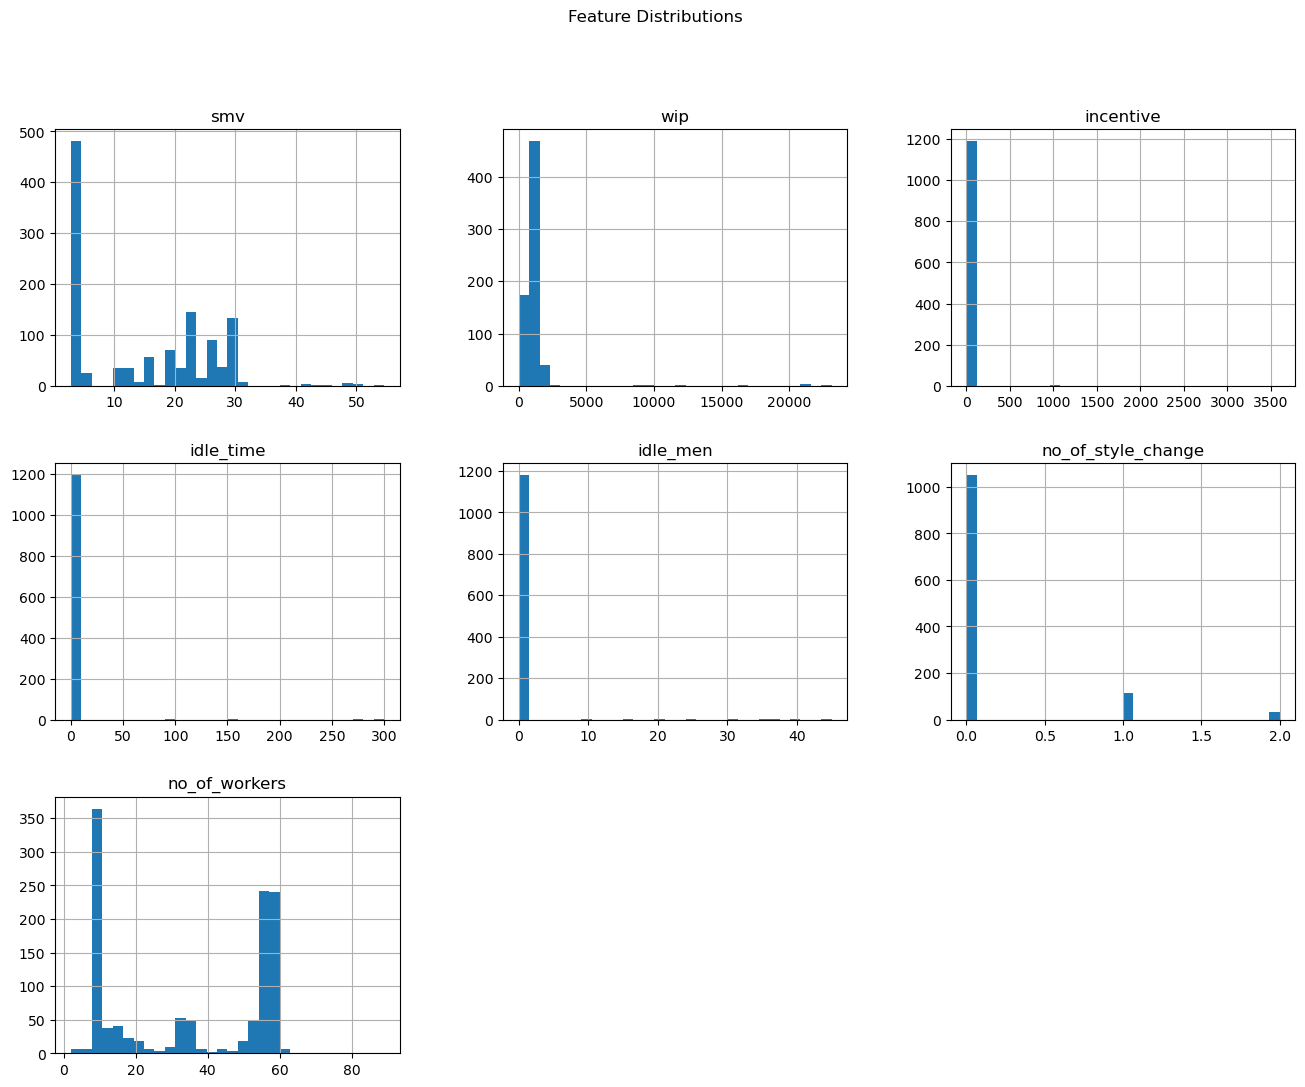

In [595]:
# Numerical variables distribution
garment_data[numerical_cols].hist(figsize=(16, 12), bins=30)
plt.suptitle('Feature Distributions')
plt.show()

/var/folders/dd/12gc6y0d43q88h764p32_xph0000gn/T/ipykernel_2596/3587281903.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/dd/12gc6y0d43q88h764p32_xph0000gn/T/ipykernel_2596/3587281903.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/dd/12gc6y0d43q88h764p32_xph0000gn/T/ipykernel_2596/3587281903.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


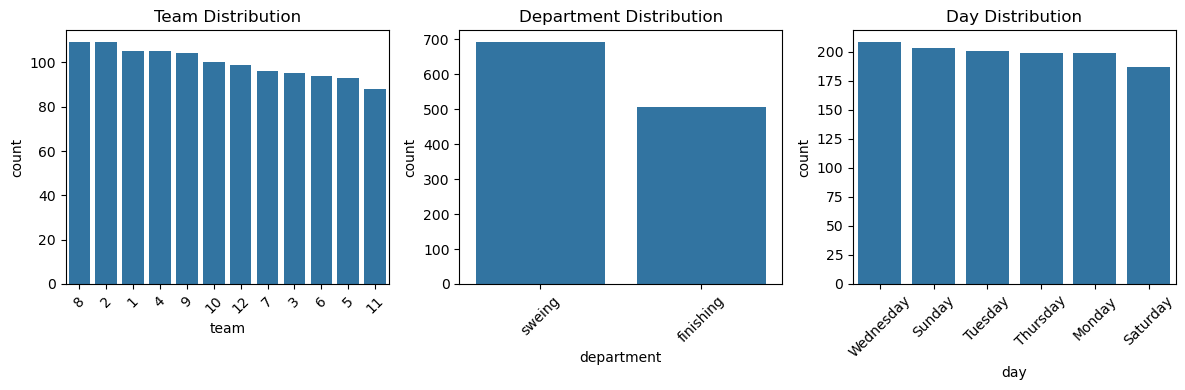

In [596]:
# Nominal Variables - Count plots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate(nominal_cols):
    sns.countplot(x=col, data=garment_data, order=garment_data[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} Distribution')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

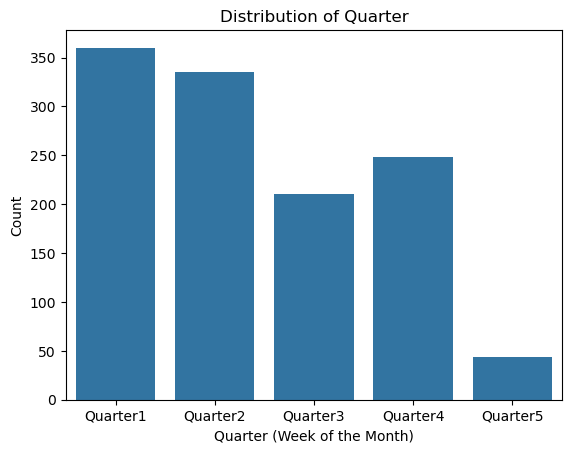

In [597]:
# Ordinal data plot
ordinal_order = ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4','Quarter5'] #assumption

sns.countplot(data=garment_data, x='quarter', order=ordinal_order)
plt.title("Distribution of Quarter")
plt.xlabel("Quarter (Week of the Month)")
plt.ylabel("Count")
plt.show()

### Observations

Based on above plots and statistical analysis


#### Numerical Feature Distributions

- **SMV (Standard Minute Value)**: Right-skewed with most tasks taking less than 5 min, some between 10 and 30 min, and a very few tasks take more than 30 min, indicating some complex tasks.

- **WIP (Work in Progress)**: Highly right-skewed with low WIP. On very few days, large backlogs are accumulated, indicating either errors or outliers (inefficiencies/delays). But, as there are more than half missing values, further exploration is required

- **Incentive**: Completely Right-skewed, with maximum teams receiving little or no incentives. A few received very high bonuses, possibly errors, more than outliers.

- **Idle Time & Idle Men**: Heavily right-skewed: Most days, teams are productive with minimal idleness. However, a few high idle times are reported, possibly errors more than outliers.

- **Number of Style Changes**: This is a discrete variable with mostly no style changes. On a few days, 1 style change was reported, but 2 style changes are very rare. This is considered good, as Frequent changes could disrupt workflow and affect productivity.

- **Number of Workers**: Clearly, bimodal distribution.  There are two prominent peaks, around 10–15 and 55–60 workers. This likely reflects different team types or departments (e.g., small finishing vs. large sewing teams).

#### Nominal Variable Analysis

- **Team**: Not all teams worked every day. The maximum days a team worked is 109, and the minimum days a team worked is 89.

- **Department**: The majority of the data points come from the **sewing** department, suggesting sewing activities are more frequently recorded compared to **finishing activities**.

- **Day**: Productivity data is fairly evenly distributed across weekdays. Slight variations show Wednesday has the highest activity, while Saturday has the least, likely reflecting weekly work patterns. There are no records of **Friday** indicating a holiday.

#### Ordinal Variable Analysis

- **Quarter Distribution** (given each month is divided into four quarters): Most observations fall into the first 2 quarters, indicating that productivity data is more concentrated in the early days of each month. There is a **Quarter5** as well with very few records, which could be either an error or indicate rare overflow periods beyond the typical monthly structure, which was not mentioned in the data description.

[Index](#Index)

### Correlation Analysis

Understanding the relationships between features.

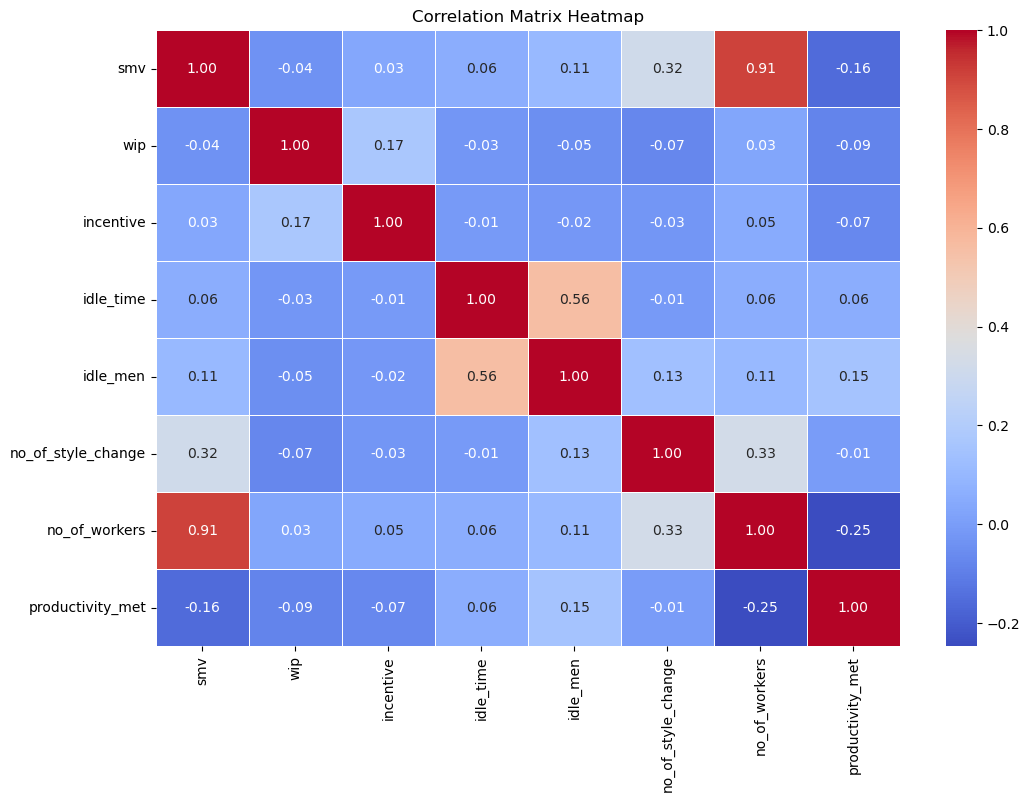

In [606]:
# Plotting the Correlation matrix
correlation_matrix = garment_data[numerical_cols + target_variable].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Observations and Action Items

**Correlated Features** (|r| > 0.5)
- `smv` and `no_of_workers` have a very strong correlation (r = 0.91)
- `idle_time` and `idle_men` are moderately correlated (r = 0.56).

**Action Items**:

- Will derive `smv_per_worker` to normalize task complexity against workforce size.
- Will drop `smv` as it is highly correlated with `no_of_workers` and relatively less correlated with `productivity_met` (-0.16 and -0.25 respectively)
- Will drop `idle_time` as raw idle time doesn't account for the team size or work hours, and will derive `idle_time / (idle_time + smv)` to get a normalized view of downtime. This ratio gives better comparability than just `idle_time`

**Correlation with actual_productivity**

- Will keep `wip` (r=-0.09): weakly correlated, but is worth testing as per domain knowledge (excess wip values lead to bottlenecks and overwhelming, hindering productivity)
- Will keep `incentive` (r=-0.07): Weakly correlated, but is worth testing as per domain knowledge (impacts motivation, indirectly impacting productivity).
- Will keep `no_of_style_change` (r=-0.01): weakly correlated, but is worth testing as per domain knowledge (style changes directly impact team workflow)

### Further analysis of the wip (work in progress) variable to finalize Imputation method

Exploring relations with categorical variables

In [611]:
categorical_cols = ordinal_cols + nominal_cols

#Calculating descriptive statistics of wip by different categories in each of the categorical variables.

for var in categorical_cols:
   print(f"\n\nStatistical Summary of 'wip' by '{var}':\n")
   summary = (
       garment_data
       .groupby(var)['wip']
       .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
       .sort_values('mean', ascending=False)
   )
   print(summary)



Statistical Summary of 'wip' by 'quarter':

          count         mean  median          std    min      max
quarter                                                          
Quarter1    211  1580.000000  1029.0  3249.698918   29.0  23122.0
Quarter5     23  1182.956522  1170.0   313.056846  282.0   1601.0
Quarter4    140  1091.178571  1090.0   397.522603   15.0   1871.0
Quarter3    129  1029.728682  1057.0   381.164555    7.0   2120.0
Quarter2    188   938.425532   964.5   331.103131   10.0   1674.0


Statistical Summary of 'wip' by 'team':

      count         mean  median          std    min      max
team                                                         
1        56  1609.196429  1418.0  2105.399150  171.0  16882.0
10       57  1528.333333  1188.0  2717.815564   10.0  21540.0
3        58  1409.293103  1129.0  2667.081452   11.0  21266.0
2        57  1326.280702   928.0  2737.032568   12.0  21385.0
9        58  1283.724138  1149.5  1088.338566   14.0   8992.0
12       59  12

**Imputation Strategy Summary**

- All `wip` values are missing for the **Finishing department**, and none of the sewing department values are missing.
- The items in the finishing department cannot logically be in the *work-in-progress* state, as it is the final production stage.
- Therefore, these values are not missed randomly, instead representing `0`.

Therefore, will impute all the missing values with `0`.


[Index](#Index)

## 4. Data Preprocessing

In [615]:
# Creating a copy of the data for preprocessing and transformations
# so that the original dataset is not altered.
garment_processed = garment_data.copy()
garment_processed.shape

(1197, 13)

### Imputing Missing values

In [618]:
# replacing null values in wip column with 0
wip_null_value_count= garment_processed['wip'].isnull().sum()
garment_processed['wip'] = garment_processed['wip'].fillna(0)

print(f"Imputed {wip_null_value_count} missing values in wip column with a value of 0")

Imputed 506 missing values in wip column with a value of 0


### Feature Engineering

#### Creating new variables based on the analysis done so far.

In [622]:
print("Data shape\nbefore adding new features:", garment_processed.shape)

# smv per worker
garment_processed['smv_per_worker'] = garment_processed['smv'] / garment_processed['no_of_workers']

# idle time ratio
garment_processed['idle_time_ratio'] = garment_processed['idle_time']/(garment_processed['idle_time'] + garment_data['smv'])

print("after adding new features:", garment_processed.shape)

Data shape
before adding new features: (1197, 13)
after adding new features: (1197, 15)


#### New variable: Incentive per worker

A high total incentive might not mean much if the team size is large. Normalizing gives better insight and helps assess the effectiveness.

`Incentive per worker = incentive / no_of_workers`

`incentive` by itself reflects management intent, while `incentive_per_worker`  reflects motivation per person.


In [625]:
# incentive per worker
garment_processed['incentive_per_worker'] = garment_processed['incentive'] / garment_processed['no_of_workers']

print("Data shape after adding incentive_per_worker feature:", garment_processed.shape)

Data shape after adding incentive_per_worker feature: (1197, 16)


### Dropping unnecessary columns

#### Date column

In [629]:
# Converting 'date' column to datetime format
garment_processed['date'] = pd.to_datetime(garment_processed['date'])

# Extracting the year and getting its distribution.
print(garment_processed['date'].dt.year.value_counts())

date
2015    1197
Name: count, dtype: int64


- Raw dates are useful for modeling temporal dependencies like trends, lags, and seasonality. In this project, we do not require time series modeling, so keeping `date` would only add noise.

- Additionally, its information is already captured by `quarter` and `day` variables, which reflect month seasonality and weekday effects.

- And also, the dataset spans only for **one year** (2015), so raw dates offer no long-term temporal trends or dependencies.

In [632]:
# Dropping date column
print("Data shape\nbefore removing the date feature:", garment_processed.shape)

garment_processed = garment_processed.drop(columns='date')

print("after removing date feature:", garment_processed.shape)

Data shape
before removing the date feature: (1197, 16)
after removing date feature: (1197, 15)


#### Based on Correlation Analysis

In [635]:
print("Data shape\nbefore dropping columns:", garment_processed.shape)

garment_processed = garment_processed.drop(['smv', 'idle_time'], axis=1)

print("after dropping columns:", garment_processed.shape)

Data shape
before dropping columns: (1197, 15)
after dropping columns: (1197, 13)


### Encoding Categorical Variables

Some machine learning models require numerical input, so categorical variables will be encoded accordingly

In this dataset, there are 4 categorical variables (not including the created target variable)

If the categorical variables are **nominal**, then One-Hot encoding or Dummy encoding is applied.  
If the categorical variables are **ordinal**, then Ordinal encoding is applied.

1. **Nominal Variables:**
      - department
      - day
      - team

2. **Ordinal Variable:**
    - **quarter**: with the order being: Quarter1 < Quarter2 < Quarter3 < Quarter4 < Quarter5 (*assumption*)

Ideally, as the number of unique categories in the team variable is more, dummy encoding is preferred. This reduces the number of newly generated columns and computational load to some extent.

In [640]:
# Dummy encoding for Nominal variables
garment_encoded = pd.get_dummies(garment_processed,
                                      columns=nominal_cols,
                                      drop_first=True,
                                      dtype='int32')

In [642]:
# Ordinal encoding
encoder = OrdinalEncoder(categories=[ordinal_order])
garment_encoded['quarter'] = encoder.fit_transform(garment_encoded[['quarter']])

print(garment_encoded["quarter"].value_counts())

quarter
0.0    360
1.0    335
3.0    248
2.0    210
4.0     44
Name: count, dtype: int64


In [643]:
# Checking the shape and column names after encoding
print(f"Data shape before encoding: {garment_processed.shape} and after encoding: {garment_encoded.shape}")
print("Encoded columns preview:")
garment_encoded.columns.to_list()

Data shape before encoding: (1197, 13) and after encoding: (1197, 27)
Encoded columns preview:


['quarter',
 'wip',
 'incentive',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'productivity_met',
 'smv_per_worker',
 'idle_time_ratio',
 'incentive_per_worker',
 'team_2',
 'team_3',
 'team_4',
 'team_5',
 'team_6',
 'team_7',
 'team_8',
 'team_9',
 'team_10',
 'team_11',
 'team_12',
 'department_sweing',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday']

**Data cleaning and feature engineering** is completed using the following steps:

- Identified and handled all missing data.
- Target variable and 4 new features were created.
- Irrelevant columns were dropped.
- Identified categorical variables that need to be encoded and applied Dummy and Ordinal Encoding accordingly.

The dataset is now ready to be split and scaled (if needed) for model building.

### Viewing the final dataset after encoding

In [648]:
garment_encoded.head()

,quarter,wip,incentive,idle_men,no_of_style_change,no_of_workers,productivity_met,smv_per_worker,idle_time_ratio,incentive_per_worker,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0.0,1108.0,98,0,0,59.0,0,0.443390,0.0,1.661017,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,0.0,0.0,0,0,0,8.0,0,0.492500,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.0,968.0,50,0,0,30.5,0,0.374098,0.0,1.639344,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0.0,968.0,50,0,0,30.5,0,0.374098,0.0,1.639344,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
4,0.0,1170.0,50,0,0,56.0,0,0.462500,0.0,0.892857,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


### Train-Test Split

We'll use the most commonly used split that works well for most cases: **80/20** split. This provides a large training set for the model while still leaving a sufficient test set to evaluate performance.

In [225]:
# Separating model features and target variables
X = garment_encoded.drop(columns=['productivity_met'])
y = garment_encoded[['productivity_met']]

In [227]:
# Splitting data into training and testing sets - using stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y) # Stratify maintains class proportions

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 957
Test set size: 240


In [229]:
# Using ravel to turn y_train and y_test into 1D arrays for further processing
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

[Index](#Index)

# Part 3. Model Building

As the dataset has a 27:73 class split with a binary classification target, even a naive model is expected to predict only the majority class and still achieve about **73%** accuracy.

- When it comes to evaluating the model, accuracy can be misleading and isn't the best metric for this dataset. Instead
- **F1 score** could be a good metric to evaluate the model overall, as it balances precision and recall. Therefore, for hyperparameter tuning, we will be using `f1_score` for scoring (at default `threshold = 0.5`).

- **Precision-Recall Curve**: Helps evaluate how well the model identifies the minority class (teams not meeting the target) and is more informative than ROC as the data is imbalanced. So, will plot only PR curve but not the ROC curve. 

## 1. Logistic Regression
We will be starting with the simple Logistic Regression model to establish
baseline performance. A good starting point for binary classification, as it offers interpretability.

### Scaling

- Logistic Regression is sensitive to feature scale, especially when using regularization (L1 or L2), which penalizes coefficients uniformly.
- Unscaled features distort the cost function, allowing high-range features to dominate, which slows down convergence and may lead to biased or suboptimal models.
- Scaling ensures fair regularization and faster optimization, while also making model coefficients more interpretable by putting all features on a comparable scale.
- Ordinal variables, along with numerical variables, can be scaled in this scenario, as they are equally spaced.
- **Standardization** is used to scale the data after splitting to prevent data leakage.

In [236]:
# Copying training data for scaling
X_train_scaled= X_train.copy()
X_test_scaled = X_test.copy()

# Defining columns to be standardized
scaling_cols = ['quarter','wip','incentive',
 'idle_men', 'no_of_style_change', 'smv_per_worker',
 'idle_time_ratio', 'incentive_per_worker']

# Initializing the scaler
scaler = StandardScaler()

# Fitting the scaler on the training data
X_train_scaled[scaling_cols] = scaler.fit_transform(X_train_scaled[scaling_cols])

# Applying the scaler to the test data
X_test_scaled[scaling_cols] = scaler.transform(X_test_scaled[scaling_cols])

print("Numerical columns have been standardized after splitting.")

Numerical columns have been standardized after splitting.


### Hyperparameter Tuning

We will be tuning the following parameters using `GridSearchCV` to find the best set of parameters.

- **penalty**: `l1` and `l2` for sparsity and stability respectively.
- **C (Regularization strength)**: As such, there is no industry standard for the regularization parameter values to try out. Therefore, using the following values to ensure a broader search space: `[0.001, 0.01,0.1, 1, 10, 100,1000]`
- **solver**: `liblinear` (good for small datasets) and `saga` (flexible and handles sparse data) - supports `l1` & `l2`
- **class_weight**: `balanced` handles class imbalance automatically. But, wanted to try even without it (`None`) to avoid overfitting as the data is moderately imbalanced.

As the data is imbalanced, `Stratified K-Fold` is needed for cross-validation. `GridSearchCV` by default uses `Stratified K-Fold` as this is a classification problem.

In [254]:
# Initializing the Logistic Regression model
lr = LogisticRegression(max_iter=10000, # increased iterations for convergence
                        random_state=7)

# Parameter grid
param_grid_lr = {
    'penalty': ['l1', 'l2'],                     # Test both regularization types
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],   # Wider range for fine-tuning
    'solver': ['liblinear', 'saga'],             # Solvers that support L1/L2
    'class_weight': [None, 'balanced']           # Handles class imbalance
}


# Grid search with 10-fold CV (stratified folds applied by default)
grid_search_lr = GridSearchCV(
    lr,
    param_grid_lr,
    cv=10,
    scoring='f1',  # as data is imbalanced 
    n_jobs=-1,
    verbose=1,     # Progress bar visibility for monitoring
)

print("\n--- Starting GridSearchCV for Logistic Regression model ---")

# Fitting the grid search on training data
grid_search_lr.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)


--- Starting GridSearchCV for Logistic Regression model ---
Fitting 10 folds for each of 56 candidates, totalling 560 fits
Best parameters for Logistic Regression: {'C': 1000, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [259]:
# Print the best cross-validation score found
print(f"Best Cross-Validation f1-score:\n {grid_search_lr.best_score_:.4f}")

Best Cross-Validation f1-score:
 0.5539


### Fitting model using the best parameters from grid search

In [262]:
# Logistic Regression model with the best parameters
best_lr = grid_search_lr.best_estimator_

# Predicting on test set.
y_pred_lr = best_lr.predict(X_test_scaled)

### Generating PR Curve

In [283]:
# Using the tuned classifier to predict class probabilities for the test set
# We need the probabilities only for the negative class (class 1).

y_pred_proba_lr = best_lr.predict_proba(X_test_scaled)[:, 1]

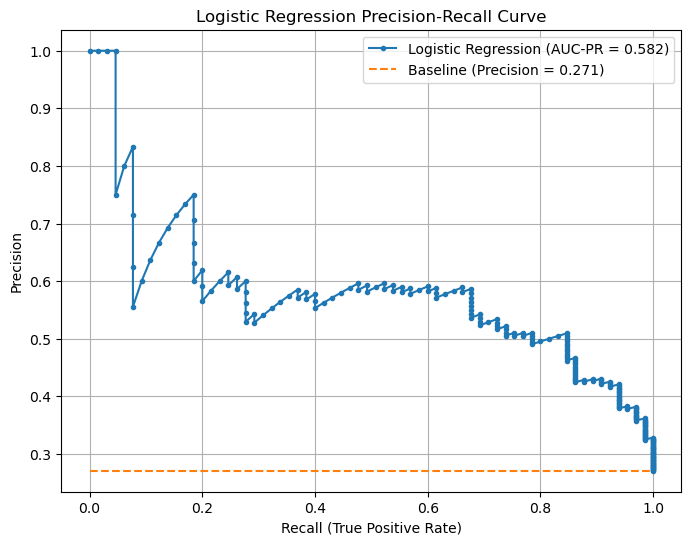

In [285]:
# Calculating precision, recall, and thresholds using precision_recall_curve
precision_points_lr, recall_points_lr, thresholds_pr_lr = precision_recall_curve(y_test, y_pred_proba_lr)

# Calculating Area Under the PR Curve (AUC-PR) using average_precision_score
auc_pr_lr = average_precision_score(y_test, y_pred_proba_lr)

# Plotting the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_points_lr, precision_points_lr, marker='.', label=f'Logistic Regression (AUC-PR = {auc_pr_lr:.3f})')

# Plotting the baseline (random guessing) for comparison as the data is imbalanced
baseline = np.sum(y_test ==1) / len(y_test)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label=f'Baseline (Precision = {baseline:.3f})')

plt.title('Logistic Regression Precision-Recall Curve')
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation

In [288]:
print(f"Baseline Precision: {baseline:.4f}")
print(f'Logistic Regression Area Under PR Curve (Average Precision): {auc_pr_lr:.4f}')

Baseline Precision: 0.2708
Logistic Regression Area Under PR Curve (Average Precision): 0.5822


**AUC-PR (Average Precision) = 0.5822**
- The model's ability to distinguish at-risk teams (class 1) is moderate.
- Model average precision is more than 2 times higher than the **Baseline Precision of 0.27**, indicating it captures meaningful signals.
- The curve is above the baseline but flattens quickly, indicating that higher recall would drastically reduce precision (more false positives)

### Optimal point threshold calculation

As f1-score balances both Precision and Recall, the optimal point will be the point with the best f1-score. 

In [345]:
# f1-score as evaluation metric
f1_scores_lr = (2 * precision_points_lr * recall_points_lr) / (precision_points_lr + recall_points_lr + 1e-9)
best_idx_lr = np.argmax(f1_scores_lr) 
best_threshold_lr = thresholds_pr_lr[best_idx_lr]     # Threshold at optimal point

In [347]:
print(f"Best Threshold for Logistic Regression: {best_threshold_lr:.3f}")

Best Threshold for Logistic Regression: 0.504


### Evaluation Metrics (Threshold = 0.504)

Evaluation metrics - Logistic Regression
Logistic Regression Metrics:
Accuracy: 0.7375
Precision: 0.5093
Recall: 0.8462
F1 Score: 0.6358


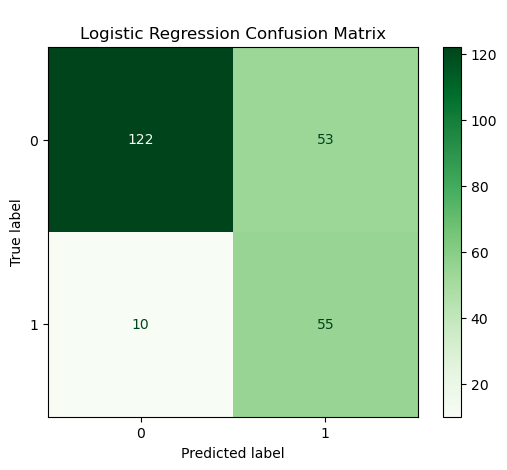


Logisitic Regression - Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       175
           1       0.51      0.85      0.64        65

    accuracy                           0.74       240
   macro avg       0.72      0.77      0.72       240
weighted avg       0.81      0.74      0.75       240



In [527]:
# Applying threshold 
y_pred_threshold_lr = (y_pred_proba_lr >= best_threshold_lr).astype(int)

# Performance Metrics
accuracy_lr = accuracy_score(y_test, y_pred_threshold_lr)
precision_lr = precision_score(y_test, y_pred_threshold_lr)
recall_lr = recall_score(y_test, y_pred_threshold_lr)
f1_lr = f1_score(y_test, y_pred_threshold_lr)

print('Evaluation metrics - Logistic Regression')
print(f"Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_threshold_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap="Greens")
plt.title("\nLogistic Regression Confusion Matrix")
plt.show()

# classification report
cr_lr = classification_report(y_test, y_pred_threshold_lr)

print('\nLogisitic Regression - Classification Report: ')
print(cr_lr)

[Index](#Index)

## 2. Random Forest

A more powerful model that can capture non-linear relationships and can better handle interactions between features.

No need for scaling of variables.

### Hyperparameter Tuning

We will be tuning the following parameters using `GridSearchCV` to find the best set of parameters.

- **n_estimators**: More trees reduce variance (overfitting), but increase compute time. As per the data size, computational resources, and time, `[50, 100, 200, 300]` is chosen.
- **max_depth**: `[10, 20, 30]` - Controls tree complexity as deeper trees may overfit. We would like ot include `None` as well to let trees grow fully.
- **min_samples_split**: We will try: `[2,5,10]`, to detect patterns in the minority class. >10 will result in over-simplified trees for this dataset size.
- **min_samples_leaf**: As per the dataset size, will try: `[1,3,5]`, ensuring that the leaves have enough samples to represent both classes.
- **class_weight**: Even though the moderate imbalance in the dataset will be handled well by the model, we would like to address it by penalizing misclassification. So, will go with `[None, 'balanced']` where `balanced` auto-adjusts weights inversely proportional to class frequencies.
- **max_features**: `sqrt` (default), `log2` work well for high-dimensional data (29 features), and will include values like `0.8`, which can sometimes improve performance.

In [314]:
# Initializing the Random Forest model
rf = RandomForestClassifier(random_state=7, n_jobs=-1)

# Parameter grid

param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,3,5],
    'class_weight': [None, 'balanced'],
    'max_features': ['sqrt', 'log2', 0.8],
}

# Grid search with 5-fold CV (stratified folds applied by default)
grid_search_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=5,
    scoring='f1',   # as data is imbalanced
    n_jobs=-1,      # uses all available processors
    verbose=1,      # Progress bar visibility for monitoring
)

print("\n--- Starting GridSearchCV for Random Forest model ---")

# Fitting the grid search on training data
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


--- Starting GridSearchCV for Random Forest model ---
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [371]:
# Print best cross-validation score found
print(f"Best Cross-Validation f1-score:\n {grid_search_rf.best_score_:.4f}")

Best Cross-Validation f1-score:
 0.6419


### Fitting model using the best parameters from grid search

In [325]:
# Random Forest model with the best parameters
best_model_rf = grid_search_rf.best_estimator_

# Predicting on test set.
y_pred_rf = best_model_rf.predict(X_test)

### Generating PR Curve

In [327]:
# Using the tuned classifier to predict class probabilities for the test set
# We need the probabilities only for the negative class (class 1).

y_pred_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]

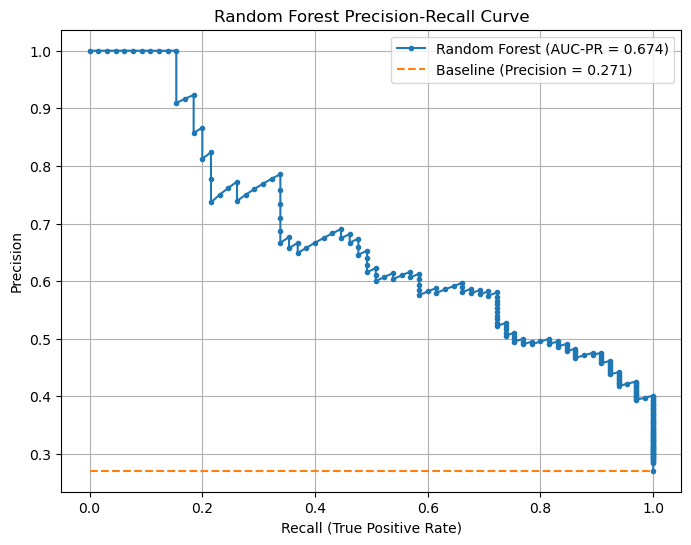

In [329]:
# Calculating precision, recall, and thresholds using precision_recall_curve
precision_points_rf, recall_points_rf, thresholds_pr_rf = precision_recall_curve(y_test, y_pred_proba_rf)

# Calculating Area Under the PR Curve (AUC-PR) using average_precision_score
auc_pr_rf = average_precision_score(y_test, y_pred_proba_rf)

# Plotting the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_points_rf, precision_points_rf, marker='.', label=f'Random Forest (AUC-PR = {auc_pr_rf:.3f})')

# Plotting the baseline (random guessing) for comparison as the data is imbalanced
baseline = np.sum(y_test ==1) / len(y_test)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label=f'Baseline (Precision = {baseline:.3f})')

plt.title('Random Forest Precision-Recall Curve')
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation of PR curve

In [331]:
print(f"Baseline Precision: {baseline:.4f}")
print(f'Random Forest Area Under PR Curve (Average Precision): {auc_pr_rf:.4f}')

Baseline Precision: 0.2708
Random Forest Area Under PR Curve (Average Precision): 0.6741


**AUC-PR (Average Precision) = 0.6474**
- The model's ability to distinguish at-risk teams (class 1) is moderate.
- Model average precision is significantly higher than the **Baseline Precision of 0.27**, indicating it captures meaningful signals.
- The curve is above the baseline but flattens quickly, indicating that higher recall would drastically reduce precision (more false positives)

### Optimal point threshold calculation

As f1-score balances both Precision and Recall, the optimal point will be the point with the best f1-score. 

In [341]:
# f1-score as evaluation metric
f1_scores_rf = (2 * precision_points_rf * recall_points_rf) / (precision_points_rf + recall_points_rf + 1e-9)
best_idx_rf = np.argmax(f1_scores_rf) 
best_threshold_rf = thresholds_pr_rf[best_idx_rf]     # Threshold at optimal point

In [343]:
print(f"Best Threshold for Random Forest: {best_threshold_rf:.3f}")

Best Threshold for Random Forest: 0.475


### Evaluation Metrics (Threshold = 0.475)

Evaluation metrics - Random Forest
Random Forest Metrics:
Accuracy: 0.7833
Precision: 0.5802
Recall: 0.7231
F1 Score: 0.6438


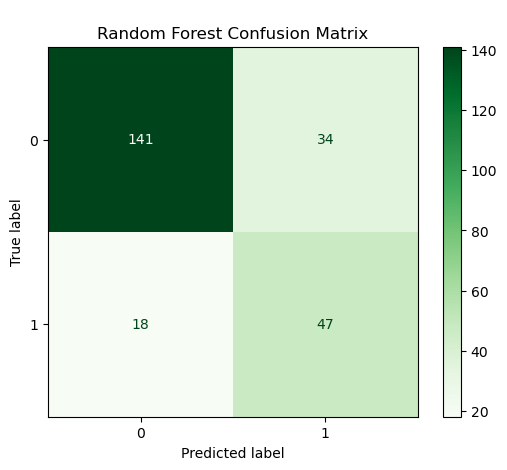


Random Forest - Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.81      0.84       175
           1       0.58      0.72      0.64        65

    accuracy                           0.78       240
   macro avg       0.73      0.76      0.74       240
weighted avg       0.80      0.78      0.79       240



In [350]:
# Applying threshold 
y_pred_threshold_rf = (y_pred_proba_rf >= best_threshold_rf).astype(int)

# Performance Metrics
accuracy_rf = accuracy_score(y_test, y_pred_threshold_rf)
precision_rf = precision_score(y_test, y_pred_threshold_rf)
recall_rf = recall_score(y_test, y_pred_threshold_rf)
f1_rf = f1_score(y_test, y_pred_threshold_rf)

print('Evaluation metrics - Random Forest')
print(f"Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_threshold_rf)
disp_cm_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_cm_rf.plot(cmap="Greens")
plt.title("\nRandom Forest Confusion Matrix")
plt.show()

# classification report
cr_rf = classification_report(y_test, y_pred_threshold_rf)

print('\nRandom Forest - Classification Report: ')
print(cr_rf)

[Index](#Index)

## 3. Gradient Boost Models - LightGBM

Out of all Gradient Boost models, LightGBM is ideal for fast and high-performing binary classification, especially when dealing with class imbalance and small-to-medium tabular data because:

- LightGBM's leaf-wise tree growth trains 3–5x faster than XGBoost. Efficient during grid search iterations i.e., quicker hyperparameter tuning.
- Better Imbalance Handling: Offers both `scale_pos_weight` (like XGBoost) and `is_unbalance=True` (auto-adjusts weights)
- LightGBM handles categorical features natively (no need for one-hot encoding).
- Delivers high F1-score and AUC-PR on imbalanced data.
- Regularization options like `num_leaves` and `min_data_in_leaf` reduce overfitting.

Therefore, will go ahead with `LightGBM`


### Train-Test Split

As LightGBM can handle categorical features, there is no need for one-hot encoding. So, will use the cleaned-up dataset `garment_processed`, which has no encodings for building this model.

We'll use the most commonly used split that works well for most cases: **80/20** split. This provides a large training set for the model while still leaving a sufficient test set to evaluate performance.

In [357]:
# Separating model features and target variables
X_lgbm = garment_processed.drop(columns=['productivity_met'])
y_lgbm = garment_processed[['productivity_met']]

# for LightGBM to recognize categorical variables
for col in categorical_cols:
    X_lgbm[col] = X_lgbm[col].astype('category')

In [359]:
# Splitting data into training and testing sets - using stratify=y
X_lgbm_train, X_lgbm_test, y_lgbm_train, y_lgbm_test = train_test_split(X_lgbm, y_lgbm, test_size=0.2, random_state=7, stratify=y) # Stratify maintains class proportions

print(f"\nTraining set size: {X_lgbm_train.shape[0]}")
print(f"Test set size: {X_lgbm_test.shape[0]}")


Training set size: 957
Test set size: 240


In [361]:
# Using ravel to turn y_train and y_test into 1D arrays for further processing
y_lgbm_train = y_lgbm_train.values.ravel()
y_lgbm_test = y_lgbm_test.values.ravel()

### Hyperparameter Tuning

 We will be tuning the following parameters using `GridSearchCV` to find the best set of parameters.

- **is_unbalance**: Quick for moderate imbalance as it auto-balances class weights.
- **max_depth**: Shallower trees prevent overfitting, `[3, 5]`
- **num_leaves**: Controls complexity. should be ≈2^max_depth, so will use `[15, 31]`
- **min_data_in_leaf**:	Wanted to try`[5,10, 20]` as lower values helps to focus on minority class but based on the warnings we are getting, we have decided to try only `[10,20]`.
- **learning_rate**: `[0.05, 0.1]`	Lower vlaues for better generalization, but slower.
- **n_estimators**:	`[100, 200]` Higher values for better performance, but slower, so taking moderately high values.
- **feature_fraction**: `[0.8, 1.0]`	Fraction of features per tree to improve diversity

In [365]:
# Initializing the LightGBM model
lgbm = LGBMClassifier(random_state=7,
                      n_jobs=-1,
                      verbose=-1,  # Suppress unnecessary messages
                      force_col_wise=True, # Avoid threading overhead warning
                      min_child_samples=5,  # Explicitly set to match min_data_in_leaf
    colsample_bytree=0.6)  # Align with feature_fraction to avoid conflicts

# Parameter grid
param_grid_lgbm = {
    'is_unbalance': [True],
    'max_depth': [3, 5],
    'num_leaves': [15, 31],
    'min_data_in_leaf': [10,20],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'feature_fraction': [0.8,1]

}

# Grid search with 5-fold CV (stratified folds applied by default)
grid_search_lgbm = GridSearchCV(
    lgbm,
    param_grid_lgbm,
    cv=5,
    scoring='f1',   # as data is imbalanced
    n_jobs=-1,      # uses all available processors
    verbose=3,      # Progress bar visibility for monitoring
)

print("\n--- Starting GridSearchCV for LightGBM model ---")

# Fitting the grid search on training data
grid_search_lgbm.fit(X_lgbm_train, y_lgbm_train)

# Best parameters
print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)


--- Starting GridSearchCV for LightGBM model ---
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters for LightGBM: {'feature_fraction': 0.8, 'is_unbalance': True, 'learning_rate': 0.05, 'max_depth': 5, 'min_data_in_leaf': 20, 'n_estimators': 100, 'num_leaves': 15}


In [369]:
# Print best cross-validation score found
print(f"Best Cross-Validation f1-score:\n {grid_search_lgbm.best_score_:.4f}")

Best Cross-Validation f1-score:
 0.6373


### Fitting model using the best parameters from grid search

In [375]:
# LightGBM model with the best parameters
best_model_lgbm = grid_search_lgbm.best_estimator_

# Predicting on test set.
y_pred_lgbm = best_model_lgbm.predict(X_lgbm_test)

### Generating PR Curve

In [378]:
# Using the tuned classifier to predict class probabilities for the test set
# We need the probabilities only for the negative class (class 1).

y_pred_proba_lgbm = best_model_lgbm.predict_proba(X_lgbm_test)[:, 1]

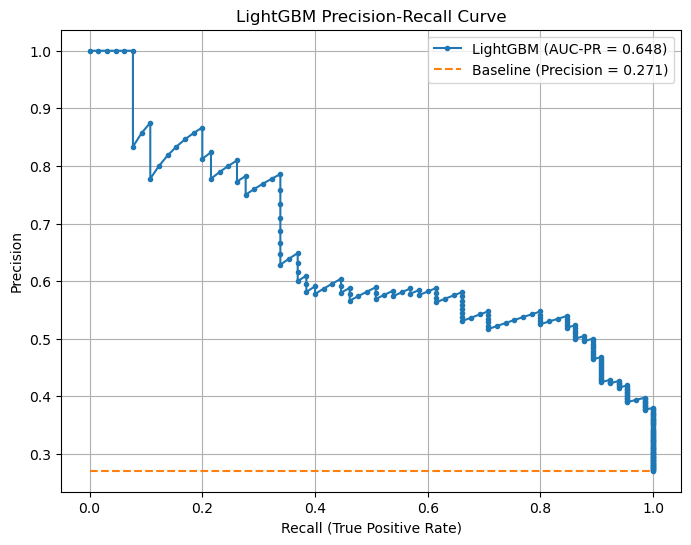

In [380]:
# Calculating precision, recall, and thresholds using precision_recall_curve
precision_points_lgbm, recall_points_lgbm, thresholds_pr_lgbm = precision_recall_curve(y_lgbm_test, y_pred_proba_lgbm)

# Calculating Area Under the PR Curve (AUC-PR) using average_precision_score
auc_pr_lgbm= average_precision_score(y_lgbm_test, y_pred_proba_lgbm)

# Plotting the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_points_lgbm, precision_points_lgbm, marker='.', label=f'LightGBM (AUC-PR = {auc_pr_lgbm:.3f})')

# Plotting the baseline (random guessing) for comparison as the data is imbalanced
baseline = np.sum(y_lgbm_test ==1) / len(y_lgbm_test)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label=f'Baseline (Precision = {baseline:.3f})')

plt.title('LightGBM Precision-Recall Curve')
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation of PR curve

In [382]:
print(f"Baseline Precision: {baseline:.4f}")
print(f'LightGBM Area Under PR Curve (Average Precision): {auc_pr_lgbm:.4f}')

Baseline Precision: 0.2708
LightGBM Area Under PR Curve (Average Precision): 0.6485


**AUC-PR (Average Precision) = 0.648**
- The model's ability to distinguish at-risk teams (class 1) is moderate.
- Model average precision is significantly higher than the **Baseline Precision of 0.27**, indicating it captures meaningful signals.
- The curve is above the baseline but flattens quickly, indicating that higher recall would drastically reduce precision (more false positives)

### Optimal point threshold calculation

As f1-score balances both Precision and Recall, the optimal point will be the point with the best f1-score. 

In [422]:
# f1-score as evaluation metric
f1_scores_lgbm = (2 * precision_points_lgbm * recall_points_lgbm) / (precision_points_lgbm + recall_points_lgbm + 1e-9)
best_idx_lgbm = np.argmax(f1_scores_lgbm) 
best_threshold_lgbm = thresholds_pr_rf[best_idx_lgbm]     # Threshold at optimal point

In [424]:
print(f"Best Threshold for LightGBM: {best_threshold_lgbm:.3f}")

Best Threshold for LightGBM: 0.449


### Evaluation Metrics (0.449)

Evaluation metrics - LightGBM
LightGBM Metrics:
Accuracy: 0.7625
Precision: 0.5426
Recall: 0.7846
F1 Score: 0.6415


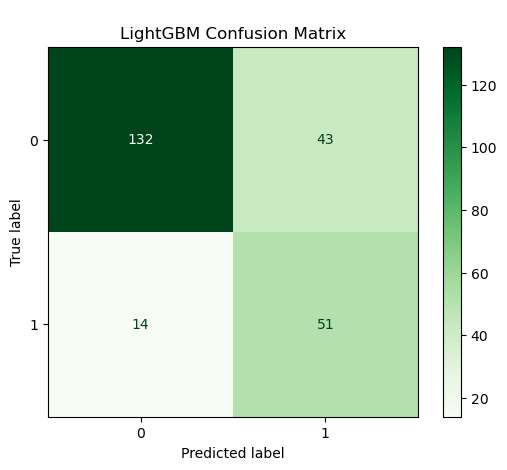

LightGBM - Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       175
           1       0.54      0.78      0.64        65

    accuracy                           0.76       240
   macro avg       0.72      0.77      0.73       240
weighted avg       0.81      0.76      0.77       240



In [525]:
# Applying threshold 
y_pred_threshold_lgbm = (y_pred_proba_lgbm >= best_threshold_lgbm).astype(int)

# Performance Metrics
accuracy_lgbm = accuracy_score(y_lgbm_test, y_pred_threshold_lgbm)
precision_lgbm = precision_score(y_lgbm_test, y_pred_threshold_lgbm)
recall_lgbm = recall_score(y_lgbm_test, y_pred_threshold_lgbm)
f1_lgbm = f1_score(y_lgbm_test, y_pred_threshold_lgbm)

print('Evaluation metrics - LightGBM')
print(f"LightGBM Metrics:")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"Precision: {precision_lgbm:.4f}")
print(f"Recall: {recall_lgbm:.4f}")
print(f"F1 Score: {f1_lgbm:.4f}")

# Confusion matrix
cm_lgbm = confusion_matrix(y_lgbm_test, y_pred_threshold_lgbm)
disp_cm_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm)
disp_cm_lgbm.plot(cmap="Greens")
plt.title("\nLightGBM Confusion Matrix")
plt.show()

# classification report
cr_lgbm = classification_report(y_lgbm_test, y_pred_threshold_lgbm)

print('LightGBM - Classification Report: ')
print(cr_lgbm)

[Index](#Index)

# Part 4. Findings and Discussion

## 1. Error Analysis

#### **False Positive (FP)**
- **Definition**: A false positive occurs when the model predicts the team will not meet the target (productivity_met=1), but in reality, they do (productivity_met=0).
- **Interpretation**: The team performs well, but the model incorrectly predicts that they are at-risk and will not meet their productivity target for that day.
- **Consequences**: False positives lead to unnecessary resource adjustment, missed recognition, and a possible drop in motivation. 

#### **False Negative (FN)**
- **Definition**: A false negative occurs when the model predicts the team will meet the target (productivity_met=0), but in reality, they don't (productivity_met=1).
- **Interpretation**: The team is at-risk, but the model incorrectly predicts that they are on track and will meet their productivity target for that day.
- **Consequences**:  Supervisors fail to intervene, missing the chance to adjust resources or support. This leads to wasted opportunities, poor productivity outcomes, and reduced trust in decision-making.

### Recommendation

Here, both errors are not acceptable, but **False Negatives are riskier than False Positives**, as supervisors doing nothing, assuming that things are on track, results in more damage. This creates a false sense of security, which is not preferred compared to some unwanted intervention.

In [393]:
# Creating a Confusion Matrix comparison table with FP, FN, TP, TN
cm_compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'LightGBM'],
    'True_Positives': [cm_lr[1,1], cm_rf[1,1],cm_lgbm[1,1]],
    'True_Negatives': [cm_lr[0,0], cm_rf[0,0],cm_lgbm[0,0]],
    'False_Positives': [cm_lr[0,1], cm_rf[0,1],cm_lgbm[0,1]],
    'False_Negatives': [cm_lr[1,0], cm_rf[1,0], cm_lgbm[1,0]]
})
cm_compare

,Model,True_Positives,True_Negatives,False_Positives,False_Negatives
0,Logistic Regression,55,122,53,10
1,Random Forest,47,141,34,18
2,LightGBM,51,132,43,14


## 2. Comparison of Evaluation Metrics

#### **Precision**: 

- **Definition**: Of all predicted at-risk teams (productivity_met=1), how many were truly at-risk (productivity_met=1)?
- **Business Impact**: Low Precision leads to unwanted interventions (reallocating resources and overtime costs), and missed recognition, which might result in potential team demotivation.
- **Prioritize**: If interventions are expensive, for example, hiring temporary workers, disrupting workflows, etc.

#### **Recall**: 

- **Definition**: Of all truly at-risk teams (productivity_met=1), how many did we correctly identify? This is crucial to avoid false negatives.
- **Business Impact**: Low recall leads to missed opportunities to intervene and prevent productivity loss, which impacts financially if targets are consistently unmet.
- **Prioritize**: If missing at-risk teams is catastrophic, for example, contract violations, reputational damage, etc.

### Recommendation

Both are important here, but as the project’s goal is early intervention and missing at-risk teams result in more financial losses, **Recall needs to be prioritized over Precision** to ensure fewer productivity slips go undetected.

In [406]:
# Creating a Metrics comparison table with Accuracy, Precision, Recall, F1-Score)
print("Metrics Comparision\n")
performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'LightGBM'],
    'Accuracy': [accuracy_lr, accuracy_rf ,accuracy_lgbm],
    'Precision': [precision_lr, precision_rf, precision_lgbm],
    'Recall': [recall_lr, recall_rf, recall_lgbm],
    'F1 Score': [f1_lr, f1_rf, f1_lgbm]
})
performance

Metrics Comparision



,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.737500,0.509259,0.846154,0.635838
1,Random Forest,0.783333,0.580247,0.723077,0.643836
2,LightGBM,0.762500,0.542553,0.784615,0.641509


## 3. Model Comparison Summary

### Logistic Regression

- **Strength**: Highest recall (84.6%) and Lowest False Negatives (10) — best at identifying at-risk teams along with minimizing the risk of missing teams that are actually at-risk.
- **Weakness**: Lowest precision (50.9%) — highest false positives (53) - leading to unnecessary interventions and resource costs.
- **Recommendation**:
  - **Best choice when False Negatives are riskier** than False Positives, i.e., suitable for **high-stakes environments** where missing an at-risk team has serious consequences, with an acceptable trade-off in operational efficiency for better intervention coverage.

### Random Forest

- **Strength**: Highest precision (58.0%) and Lowest False Positives (34)- reducing unnecessary interventions.
- **Weakness**: Lowest recall (72.3%) — higher chance of missing at-risk teams.
- **Recommendation**:
  - Ideal for **cost-sensitive operations** where interventions are expensive and resources are limited.
  - **Not suitable** when the cost of missing an underperforming team is high.

### LightGBM

- **Strength**: Balanced recall (78.5%) and precision (54.3%).
- **Weakness**: Moderate False Negatives (14) and False Positives (43).
- **Recommendation**:
    - Best suited for scenarios where **false positives and false negatives carry relatively equal costs**, i.e., when looking for a balance between **intervention efficiency and coverage**.

## 4. Recommended Model and its usage

### Logistic Regression

This model is recommended as it delivered the **highest recall (84.6%)** and **lowest false negatives (10)** among all models. This directly aligns with the business need to **minimize undetected at-risk teams**, ensuring:
- Early identification of performance issues
- Proactive intervention to avoid production delays
- Improved confidence in managerial decisions

While the model had lower precision (50.9%) and the highest false positives (53), this trade-off is acceptable in contexts where **missing a real issue is riskier than reacting to a false alarm**.


### Model Usage
1. **Integrate with Daily Operations Dashboard**: Use the model to generate risk flags for each team at the start of the day based on input features. These can be displayed in a simple color-coded dashboard for supervisors to review.

2. **Set Customizable Thresholds for Precision vs. Recall**  
   Implement functionality to adjust the decision threshold dynamically — for example:
   - **Lower thresholds** during critical production cycles to catch more at-risk teams (high recall).
   - **Higher thresholds** when resource allocation is tight to avoid too many false positives.

4. **Design an Escalation Protocol**  
   Automate alerts based on model predictions — for example:
   - Green: Low risk — no action.
   - Yellow: Moderate risk — recommend monitoring.
   - Red: High risk — intervene with resource or support.

6. **Feedback Loop for Continuous Improvement**  
   Collect post-intervention outcomes to retrain and fine-tune the model, ensuring it stays relevant as team behavior and processes evolve.



### Qualifications and Considerations

- **Model Interpretability**: Logistic Regression offers transparency, which is helpful for supervisor trust. However, complex non-linear patterns may be missed.

- **Data Quality Dependency**: Prediction quality depends heavily on timely and accurate input features (e.g., shift data, resource allocation, prior team history). Incomplete or outdated data could degrade model reliability.

- **Not a Decision-Maker**: The model should **assist**, not replace, human judgment. Final decisions should consider real-time context, resource availability, and operational constraints.

- **False Positives Still Costly**: While acceptable in the current context, frequent unnecessary interventions can eventually cause supervisor fatigue or reduce trust in the system; periodic performance review is essential.

[Index](#Index)

# Part 5. Conclusion

### Business Problem Recap:

The key business question is **"Can we predict at-risk teams in advance so that timely resource adjustments can be made?"**

The goal of this project is to **build a binary classification model to predict if a team will meet its daily productivity target**, enabling **supervisors to intervene proactively** and avoid costly underperformance.

This prediction needed to balance two critical business impacts:
- **False Negatives (missed at-risk teams)**: Risk of no intervention, leading to lost productivity, potential contract violations, and reputational harm.
- **False Positives (false alarms)**: Risk of unnecessary interventions, leading to wasted resources, overtime costs, and demotivated teams.

### Model Evaluation Summary:

- We compared three models — **Logistic Regression**, **Random Forest**, and **LightGBM** — using classification metrics (precision, recall, F1-score) and error analysis (FP, FN).
- **Recall is more critical** than precision in this case, as failing to detect at-risk teams has more severe financial and operational consequences than overreacting to false alarms.
- Therefore, **minimizing False Negatives (FN)** is the top priority.

### Final Recommendation:

**Logistic Regression** is the most suitable model:
  - **Best recall (84.6%)** — catches almost all at-risk teams.
  - **Lowest FN (10)** — minimizes missed interventions.
  - Though it has a higher FP (53), the trade-off is acceptable in the context of early warning systems where **missing a real risk is costlier than overreacting**.

### Business Action:
- Deploy **Logistic Regression** for early risk detection in production.
- Set an **appropriate decision threshold** to balance intervention costs over time.
- Regularly retrain and monitor model performance to adapt to changing team dynamics and operational constraints.

#### We can reliably identify at-risk teams in advance, enabling smarter, proactive decision-making, and the Logistic Regression model best serves this business goal.